In [79]:
import pandas as pd
import numpy as np
import random
p1=pd.read_excel('output_zillow.xlsx',sheet_name=0)
p1

p1.head(5)

,Unnamed: 0,street,city,zip_code,address,price,bds,ba,sqft,links,...,Annual tax amount,HOA AMENITIES.1,POOL,HOA Fees Freq,STYLE,List Date,WATER/SEWER,Class,View description,LOT DESCRIPTION
0,1,40400 Canyon Heights Dr,Fremont,CA 94539,"40400 Canyon Heights Dr, Fremont, CA 94539",2520000,5,3.0,3535,https://www.zillow.com/homedetails/40400-Canyo...,...,25117,None,In Ground Spa Hot Tub Pool Sweep,None,Contemporary,2020-02-14,Sewer System - Public Water - Public,RESIDENTIAL,City Mountain Park Territorial,Other Up Slope Premium Lot
1,2,104 Lena Ct,Pleasant Hill,CA 94523,"104 Lena Ct, Pleasant Hill, CA 94523",1200000,4,3.0,2832,https://www.zillow.com/homedetails/104-Lena-Ct...,...,10934,None,None,None,None,None,None,None,Partial Mt Diablo,None
2,3,3706 Angus Way,Pleasanton,CA 94588,"3706 Angus Way, Pleasanton, CA 94588",990000,3,2.0,1309,https://www.zillow.com/homedetails/3706-Angus-...,...,8494,None,None,None,Contemporary,2020-02-06,Sewer System - Public Water - Public,RESIDENTIAL,Territorial,Corner
3,4,2070 47th Ave,San Francisco,CA 94116,"2070 47th Ave, San Francisco, CA 94116",1250000,2,1.0,1000,https://www.zillow.com/homedetails/2070-47th-A...,...,1781,None,None,None,None,None,None,None,None,None
4,5,5004 Westside Dr,San Ramon,CA 94583,"5004 Westside Dr, San Ramon, CA 94583",1740000,5,4.0,4196,https://www.zillow.com/homedetails/5004-Westsi...,...,18816,None,None,None,Mediterranean,2020-02-05,Sewer System - Public Water - Public,RESIDENTIAL,City Territorial,Premium Lot


In [177]:
bayarea = p1[(p1.city ==' San Francisco') | (p1.city == ' San Jose') | (p1.city == ' Oakland') | (p1.city == ' Fremont') | (p1.city == ' Concord')]
bayarea.to_csv('check3.csv',header = True, index=False)
#bayarea

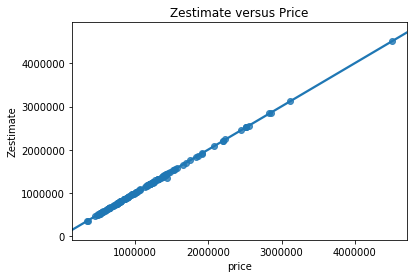

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot('price','Zestimate',data=bayarea)
plt.title('Zestimate versus Price')
#plt.xticks(rotation=90)
plt.show()



In [90]:

w= bayarea[['city','ba']]
w

,city,ba
0,Fremont,3.0
3,San Francisco,1.0
10,San Jose,2.0
12,San Jose,2.0
17,Oakland,1.0
...,...,...
521,Oakland,2.0
524,Oakland,4.0
537,Fremont,4.0
540,Fremont,3.0


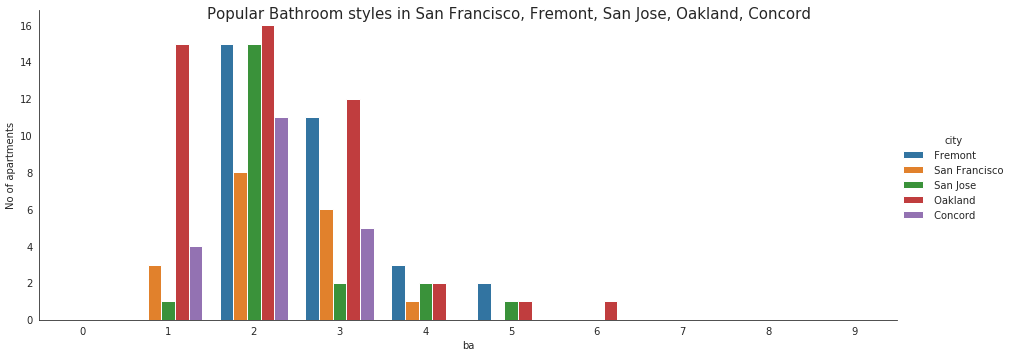

In [91]:
with sns.axes_style('white'):
    b = sns.factorplot("ba", data=w, aspect=2.5, kind='count',hue='city', order=range(0,10))
    b.set_ylabels('No of apartments')
    b.fig.suptitle('Popular Bathroom styles in San Francisco, Fremont, San Jose, Oakland, Concord',fontsize=15)

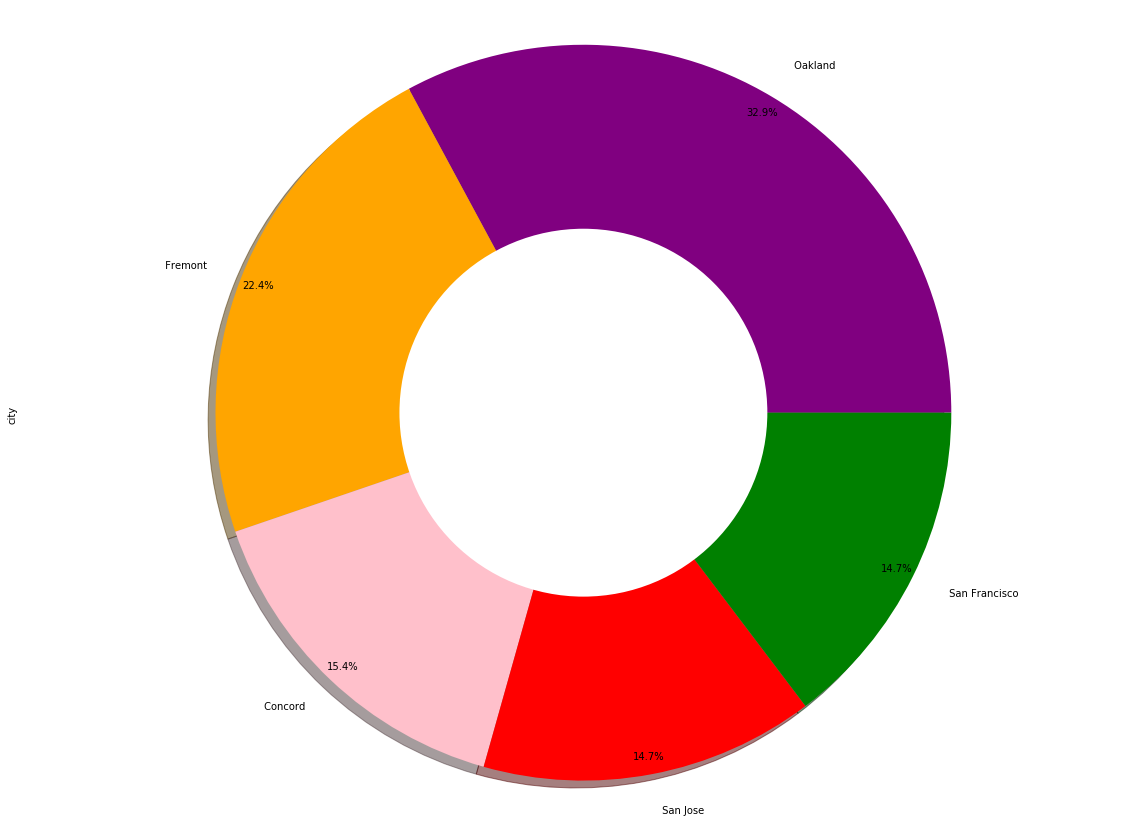

In [176]:
a=bayarea["city"].value_counts()
b= pd.DataFrame(a)
#c=b.head(6)

colors=['purple','orange','pink','red','green']

plot = a.plot.pie(subplots=True,colors=colors,shadow=True, figsize=(20, 15),pctdistance=0.95,autopct='%1.1f%%')
#plt.legend(title="CITY",loc='center')
centre_circle = plt.Circle((0,0),0.50,fc='white')
explode = (0, 0.1, 0, 0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.show()

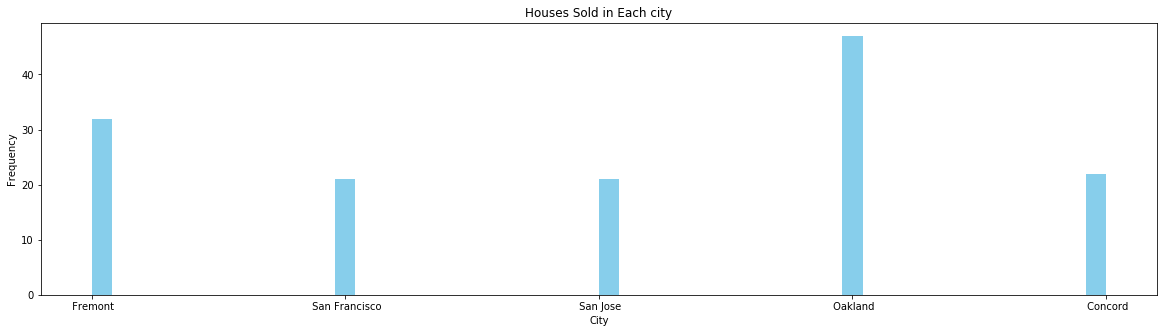

In [126]:
x1=bayarea['city']
plt.figure(figsize=(20,5))
num_bins = 50

plt.hist(x1, num_bins, facecolor='skyblue')

plt.xticks(rotation=360)

plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Houses Sold in Each city')

plt.show()

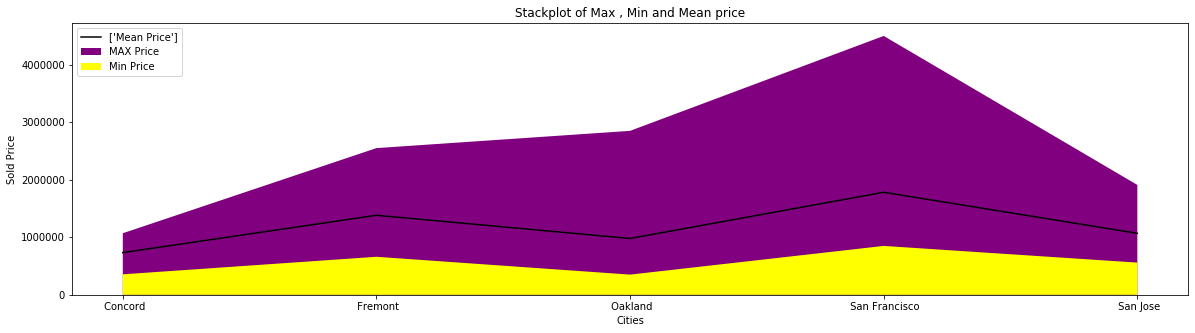

In [123]:
x1=y1["city"]
x1

maxcity=bayarea.groupby(['city']).max()
y = maxcity["price"]
y1=y.reset_index()
#y1

mincity=bayarea.groupby(['city']).min()
#mincity
z = mincity["price"]
z1=z.reset_index()
#z1

meancity=bayarea.groupby(['city']).mean()
meancity
m1 = meancity["price"]
m1
y2=m1.reset_index()
y2=y2["price"]

plt.figure(figsize=(20,5))
plt.stackplot(x1,y, labels=['MAX Price'],colors='purple')
#plt.stackplot(x1,y2, labels=['Mean Price'],colors='yellow')
plt.stackplot(x1,z, labels=['Min Price'],colors='yellow')

plt.xlabel('Cities')
plt.ylabel('Sold Price')
plt.title('Stackplot of Max , Min and Mean price')

#plt.plot(x1, y, 'red',label=['MAX Price']) 
#plt.plot(x1, z, 'green',label=['Min Price'])
plt.plot(x1, y2, 'black',label=['Mean Price'])

#plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

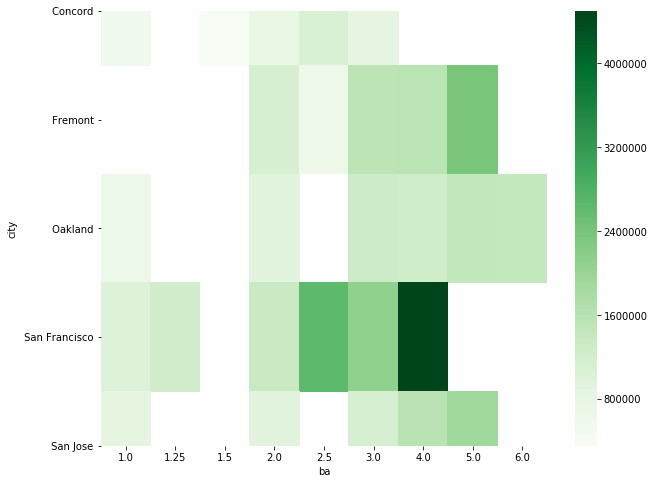

In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns


bayarea = bayarea.reset_index(drop=True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
Band= bayarea.pivot_table(values='price',index='city',columns='ba')
Band
Band1= sns.heatmap(Band, annot=False, cmap='Greens', fmt='.2f')
plt.yticks(rotation=360)

plt.show()